In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
import keras 
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, \
        Dropout, Conv1D, BatchNormalization, Activation, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from IPython.display import display 
from PIL import Image
import itertools

Using TensorFlow backend.


In [2]:
train_path = 'C:/Users/Nicolas/Documents/Practice Projects Jupyter/ChessPieces/train'
val_path = 'C:/Users/Nicolas/Documents/Practice Projects Jupyter/ChessPieces/val'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, 
                            target_size=(30, 30), classes=['knights', 'pawns'], 
                                                         batch_size=10)
val_batches = ImageDataGenerator().flow_from_directory(val_path, 
                            target_size=(30, 30), classes=['knights', 'pawns'], 
                                                       batch_size=4)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
def plots(ims, figsize=(12, 6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0, 2, 3, 1))
    f = plt.figure(figsize=figsize)
    if len(ims) % 2 == 0:
           cols = len(ims)//rows
    else:
           len(ims)//rows +1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

C:\Users\Nicolas\Miniconda3\envs\tfenv\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


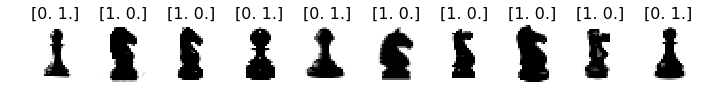

In [6]:
plots(imgs, titles=labels)

In [7]:
model = Sequential([
                    Conv2D(32, (3, 3), input_shape=(30, 30, 3)),
                    Flatten(),
                    Dense(10, activation='relu'),
                    Dense(10, activation='relu'),
                    Dense(2, activation='softmax')
                    ])

In [8]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
steps_per_epoch=4
validation_steps=4
epochs=15

In [10]:
history = model.fit_generator(train_batches, steps_per_epoch=4, validation_data=val_batches, 
                    validation_steps=validation_steps, epochs=epochs)

Epoch 1/15
4/4 [==============================] - 1s 263ms/step - loss: 15.8710 - accuracy: 0.4750 - val_loss: 5.8010 - val_accuracy: 0.4375
Epoch 2/15
4/4 [==============================] - 0s 34ms/step - loss: 6.2267 - accuracy: 0.5000 - val_loss: 5.5674 - val_accuracy: 0.6250
Epoch 3/15
4/4 [==============================] - 0s 35ms/step - loss: 2.4456 - accuracy: 0.7500 - val_loss: 3.3333 - val_accuracy: 0.7500
Epoch 4/15
4/4 [==============================] - 0s 35ms/step - loss: 0.7618 - accuracy: 0.9250 - val_loss: 0.2028 - val_accuracy: 0.9375
Epoch 5/15
4/4 [==============================] - 0s 35ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.0329 - val_accuracy: 0.9375
Epoch 6/15
4/4 [==============================] - 0s 34ms/step - loss: 0.3815 - accuracy: 0.9500 - val_loss: 0.6911 - val_accuracy: 0.9375
Epoch 7/15
4/4 [==============================] - 0s 38ms/step - loss: 2.3559e-04 - accuracy: 1.0000 - val_loss: 3.6680e-04 - val_accuracy: 1.0000
Epoch 8/15
4/4 [=

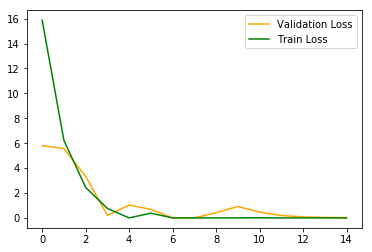

In [11]:
plt.plot(history.history['val_loss'], color='orange')
plt.plot(history.history['loss'], color='green')
plt.legend(['Validation Loss', 'Train Loss'])